In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [186]:
#import data
df=pd.read_csv('house_prices1.csv')

In [187]:
#normalize data
df=(df-df.min())/(df.max()-df.min())
#create test and train sets
data_x_ha = df['house age'].values.reshape(-1,1)
data_x_mrt = df['distance to the nearest MRT station'].values.reshape(-1,1)
data_x_ncs = df['number of convenience stores'].values.reshape(-1,1)
data_y = df['house price of unit area'].values.reshape(-1,1)
train_x_ha, test_x_ha, train_y, test_y = train_test_split(
    data_x_ha, data_y, test_size=0.25, shuffle = False)
train_x_mrt, test_x_mrt = train_test_split(
    data_x_mrt, test_size=0.25, shuffle = False)
train_x_ncs, test_x_ncs = train_test_split(
    data_x_ncs, test_size=0.25, shuffle = False)

In [188]:
#mean squared error
def mse(X,y,theta0,theta1):
    return np.mean((predict(theta0, theta1, X) - y)**2)
    

In [189]:
#stochastic gradient descent algorithm
def sgd(x, y, theta0, theta1, learning_r, iterations):
    
    df1 = pd.DataFrame(columns=['iterations', 'mse','theta0','theta1'])
    for i in range(iterations):
        theta0_prev = theta0
        #not sure if 2 is needed
        theta0 = theta0_prev + learning_r*np.mean(2*(y - (theta0 + theta1*x)))
        theta1_prev = theta1
        theta1 = theta1_prev + learning_r*np.mean(2*x*(y - (theta0 + theta1*x)))
        df1.loc[i] = [int(i+1), mse(x,y,theta0,theta1),theta0,theta1]
    return theta0, theta1, df1

In [190]:
#show a table of the values in sgd for each iteration
theta0, theta1, df1 = sgd(train_x_ha, train_y, -1, -0.5, 0.01, 50)
df1

,iterations,mse,theta0,theta1
0,1.0,2.112081,-0.970390,-0.487444
1,2.0,2.014332,-0.941477,-0.475187
2,3.0,1.921135,-0.913243,-0.463223
3,4.0,1.832278,-0.885674,-0.451544
4,5.0,1.747559,-0.858752,-0.440143
5,6.0,1.666786,-0.832463,-0.429015
6,7.0,1.589774,-0.806793,-0.418152
7,8.0,1.516348,-0.781726,-0.407548
8,9.0,1.446342,-0.757247,-0.397198
9,10.0,1.379597,-0.733345,-0.387094


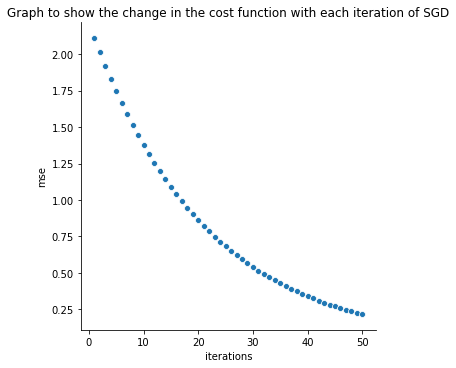

In [191]:
#plot mse vs iterations graph
sns.relplot(x='iterations',y='mse',data=df1)
plt.title('Graph to show the change in the cost function with each iteration of SGD')
plt.show()

In [192]:

print('Evaluation of Each Model\n')
print('House Age vs House Price:')
print('   RMSE training set: ' + str(np.sqrt(mse(train_x_ha, train_y, theta0, theta1))))
print('   RMSE test set:     ' + str(np.sqrt(mse(test_x_ha, test_y, theta0, theta1))))
theta0_mrt, theta1_mrt, df1 = sgd(train_x_mrt, train_y, -1, -0.5, 0.01, 50)
print()
print('House Age vs Distance to Nearest MRT station:')
print('   RMSE training set: ' + str(np.sqrt(mse(train_x_mrt, train_y, theta0_mrt, theta1_mrt))))
print('   RMSE test set:     ' + str(np.sqrt(mse(test_x_mrt, test_y, theta0_mrt, theta1_mrt))))
print()
print('House Age vs Number of Convenience Stores:')
print('   RMSE training set: ' + str(np.sqrt(mse(train_x_ncs, train_y, theta0, theta1))))
print('   RMSE test set:     ' + str(np.sqrt(mse(test_x_ncs, test_y, theta0, theta1))))

Evaluation of Each Model

House Age vs House Price:
   RMSE training set: 0.4646580834046557
   RMSE test set:     0.4850905246913478

House Age vs Distance to Nearest MRT station:
   RMSE training set: 0.4875065804214831
   RMSE test set:     0.5234588152197315

House Age vs Number of Convenience Stores:
   RMSE training set: 0.47301352004872615
   RMSE test set:     0.49146019491166837
